# Initial EDA
Unencrypted data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Datasets

In [3]:
df_3_false = pd.read_csv('../data/samples/sample_hdumb_3_false.csv')
df_3_false

,timestamp,src_port,dst_port,payload_length
0,1.657931e+09,40597,10000,104
1,1.657931e+09,10000,40597,104
2,1.657931e+09,40597,10000,157
3,1.657931e+09,33879,10000,104
4,1.657931e+09,10000,33879,104
...,...,...,...,...
72326,1.657931e+09,52951,10000,77
72327,1.657931e+09,10000,33879,52
72328,1.657931e+09,10000,40597,77
72329,1.657931e+09,10000,33879,77


In [4]:
df_3_false.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72331 entries, 0 to 72330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       72331 non-null  float64
 1   src_port        72331 non-null  int64  
 2   dst_port        72331 non-null  int64  
 3   payload_length  72331 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.2 MB


In [5]:
df_3_true = pd.read_csv('../data/samples/sample_hdumb_3_true.csv')
df_3_true

,timestamp,src_port,dst_port,payload_length
0,1.657931e+09,54812,10000,104
1,1.657931e+09,10000,54812,104
2,1.657931e+09,60886,10000,104
3,1.657931e+09,54812,10000,157
4,1.657931e+09,10000,60886,104
...,...,...,...,...
212229,1.657931e+09,40067,10000,677
212230,1.657931e+09,60886,10000,899
212231,1.657931e+09,40067,10000,48
212232,1.657931e+09,54812,10000,75


In [6]:
df_5_false = pd.read_csv('../data/samples/sample_hdumb_5_false.csv')
df_5_true = pd.read_csv('../data/samples/sample_hdumb_5_true.csv')
df_8_false = pd.read_csv('../data/samples/sample_hdumb_8_false.csv')
df_8_true = pd.read_csv('../data/samples/sample_hdumb_8_true.csv')

## Port Analysis

In [7]:
df_3_false.dst_port.unique()

array([10000, 40597, 33879, 52951])

In [8]:
df_3_true.dst_port.unique()

array([10000, 54812, 60886, 40067])

In [9]:
df_5_false.dst_port.unique()

array([10000, 33010, 33042, 54792, 57259, 58248])

In [10]:
df_5_true.dst_port.unique()

array([10000, 44863, 48152, 39325, 42680, 47298])

In [11]:
df_8_false.dst_port.unique()

array([10000, 45196, 36058, 47200, 33042, 53404, 44949, 44056, 50938])

The number of distinct ports is same as the number of clients

## Packet analysis

In [12]:
dataframe_names = [
    'df_3_false', 'df_3_true',
    'df_5_false', 'df_5_true',
    'df_8_false', 'df_8_true'
]

packet_stats = pd.DataFrame(columns=['num_client', 'video_on', 'total_packets', 'total_bytes', 'avg_bytes', 'std_bytes', 'median_bytes', 'min_bytes', 'max_bytes'])

for i, name in enumerate(dataframe_names):
    df = globals()[name]
    total_packets = len(df)
    total_bytes = df['payload_length'].sum()
    avg_bytes = df['payload_length'].mean()
    std_bytes = df['payload_length'].std()
    median_bytes = df['payload_length'].median()
    min_bytes = df['payload_length'].min()
    max_bytes = df['payload_length'].max()
    
    packet_stats.loc[i] = {'num_client': name.split('_')[1],
                           'video_on': name.split('_')[2],
                           'total_packets': total_packets,
                           'total_bytes': total_bytes,
                           'avg_bytes': avg_bytes,
                           'std_bytes': std_bytes,
                           'median_bytes': median_bytes,
                           'min_bytes': min_bytes,
                           'max_bytes': max_bytes}
    
packet_stats

,num_client,video_on,total_packets,total_bytes,avg_bytes,std_bytes,median_bytes,min_bytes,max_bytes
0,3,false,72331,6492047,89.754697,26.624026,78.0,14,546
1,3,true,212234,97958861,461.560641,412.590239,336.0,14,1214
2,5,false,164732,14826232,90.002137,27.524048,79.0,14,547
3,5,true,437896,203677197,465.126873,408.238494,360.0,14,1214
4,8,false,343012,29201537,85.132698,22.277256,77.0,14,547
5,8,true,929077,424205457,456.588051,399.737841,355.0,14,1214


**Findings**
- `total_packets` and `total_bytes` are significantly different for video on vs off, and number of clients
- Other statistics are significantly different depending on video on or off but they are similar for all number of clients
- `min_bytes` are same for all

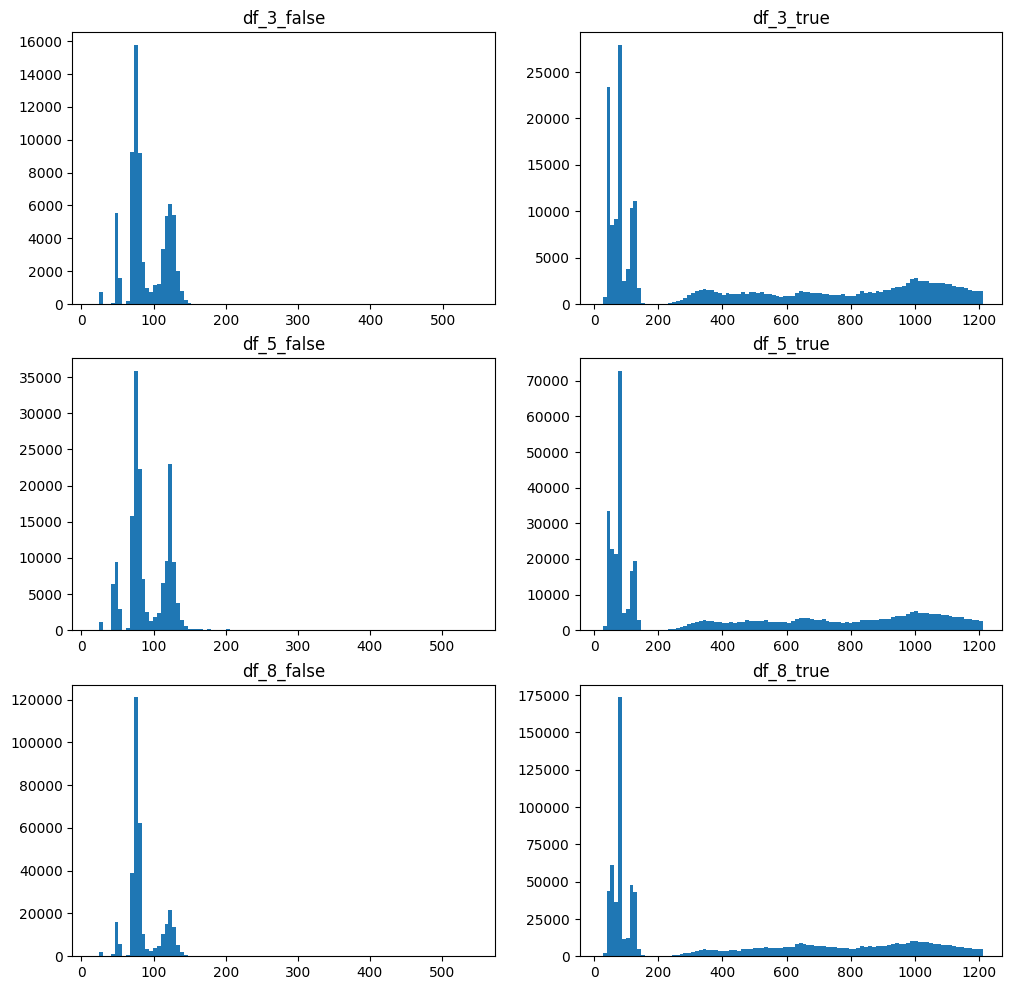

In [13]:
plt.figure(figsize=(12, 12))
nrows = 3
ncols = 2

for i, name in enumerate(dataframe_names):
    df = globals()[name]
    plt.subplot(nrows, ncols, i+1)
    plt.hist(df['payload_length'], bins=100)
    plt.title(name)

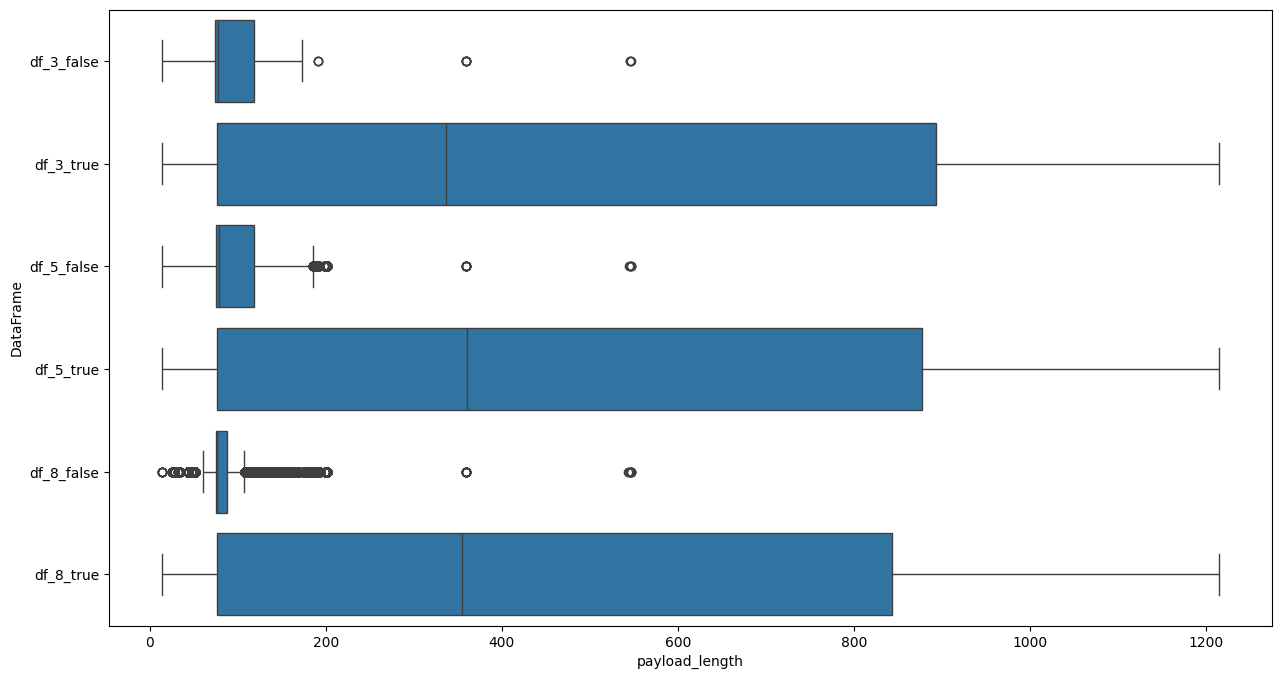

In [24]:
combined_data = []

# Iterate through each DataFrame name
for name in dataframe_names:
    # Access the DataFrame
    df = globals()[name]
    # Create a temporary DataFrame with necessary data and an identifier column
    temp_df = df[['payload_length']].copy()
    temp_df['DataFrame'] = name
    # Add the temporary DataFrame to the list
    combined_data.append(temp_df)

# Concatenate all the temporary DataFrames into one
combined_df = pd.concat(combined_data)

plt.figure(figsize=(15, 8))
sns.boxplot(data=combined_df, y='DataFrame', x='payload_length', orient='h') 
plt.show()

## Packet Inter-Arrival Time

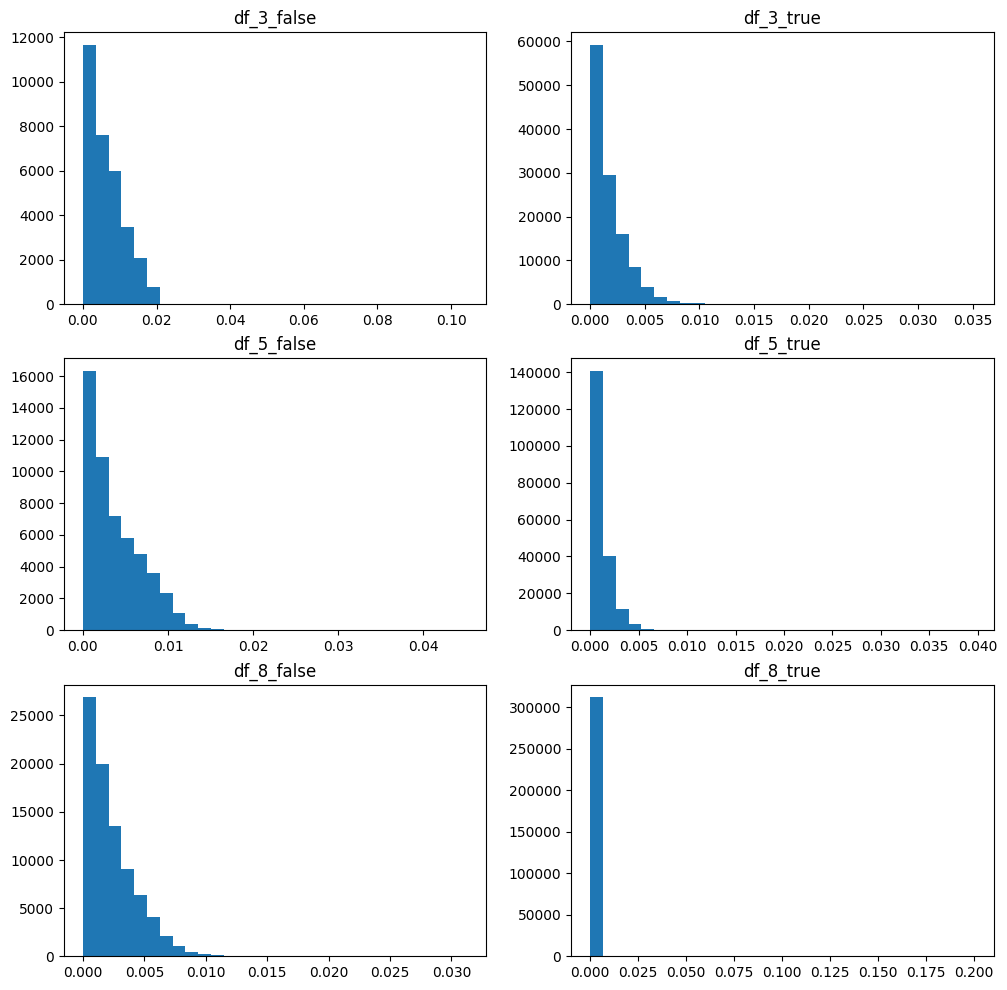

In [45]:
plt.figure(figsize=(12, 12))
nrows = 3
ncols = 2

for i, name in enumerate(dataframe_names):
    df = globals()[name]
    df_filtered = df[df['dst_port'] == 10000].copy()  # Only inbound traffic
    df_filtered.sort_values(by='timestamp', inplace=True)
    plt.subplot(nrows, ncols, i+1)
    plt.hist(df_filtered['timestamp'].diff(), bins=30)
    plt.title(name)

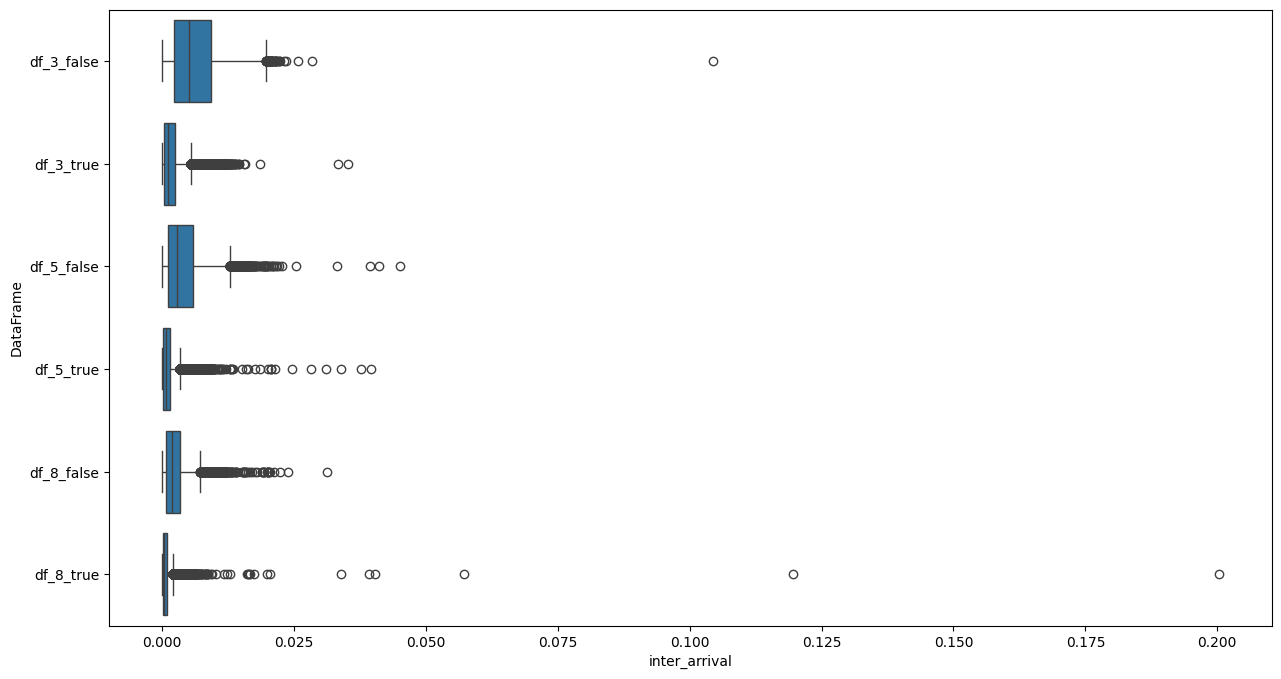

In [46]:
combined_data = []

# Iterate through each DataFrame name
for name in dataframe_names:
    # Access the DataFrame
    df = globals()[name]
    # Create a temporary DataFrame with necessary data and an identifier column
    df_filtered = df[df['dst_port'] == 10000].copy()
    temp_df = df_filtered[['timestamp']].copy()
    temp_df.sort_values(by='timestamp', inplace=True)
    temp_df['inter_arrival'] = temp_df['timestamp'].diff().fillna(0) 
    temp_df['DataFrame'] = name
    # Add the temporary DataFrame to the list
    combined_data.append(temp_df)

# Concatenate all the temporary DataFrames into one
combined_df = pd.concat(combined_data)


plt.figure(figsize=(15, 8))
sns.boxplot(data=combined_df, y='DataFrame', x='inter_arrival', orient='h') 
plt.show()

In [47]:
packet_stats = pd.DataFrame(columns=['num_client', 'video_on', 'avg', 'std', 'median', 'min', 'max'])

for i, name in enumerate(dataframe_names):
    df = globals()[name]
    df_filtered = df[df['dst_port'] == 10000].copy()
    df_filtered.sort_values(by='timestamp', inplace=True)
    avg = df_filtered['timestamp'].diff().mean()
    std = df_filtered['timestamp'].diff().std()
    median = df_filtered['timestamp'].diff().median()
    minim = df_filtered['timestamp'].diff().min()
    maxim = df_filtered['timestamp'].diff().max()
    
    packet_stats.loc[i] = {'num_client': name.split('_')[1],
                           'video_on': name.split('_')[2],
                           'avg': avg,
                           'std': std,
                           'median': median,
                           'min': minim,
                           'max': maxim}
    
packet_stats

,num_client,video_on,avg,std,median,min,max
0,3,false,0.006281,0.004844,0.005180,0.0,0.104380
1,3,true,0.001653,0.001665,0.001198,0.0,0.035164
2,5,false,0.003751,0.003193,0.002867,0.0,0.045168
3,5,true,0.001007,0.001097,0.000695,0.0,0.039667
4,8,false,0.002316,0.002009,0.001817,0.0,0.031288
5,8,true,0.000628,0.000835,0.000405,0.0,0.200286


**Findings**
- Inter-arrival times are smaller for larger number of clients
- Inter-arrival times are smaller for video on

## Packet Analysis Extra
Inbound vs Outboud

In [49]:
packet_stats = pd.DataFrame(columns=[
    'num_client', 'video_on', 
    'total_packets_in', 'total_bytes_in', 'avg_bytes_in', 'std_bytes_in', 'median_bytes_in', 'min_bytes_in', 'max_bytes_in',
    'total_packets_out', 'total_bytes_out', 'avg_bytes_out', 'std_bytes_out', 'median_bytes_out', 'min_bytes_out', 'max_bytes_out'
])

for i, name in enumerate(dataframe_names):
    df = globals()[name]
    
    # Inbound traffic: destination port is 10000
    df_in = df[df['dst_port'] == 10000]
    # Outbound traffic: source port is 10000
    df_out = df[df['src_port'] == 10000]
    
    # Calculating statistics for inbound traffic
    total_packets_in = len(df_in)
    total_bytes_in = df_in['payload_length'].sum()
    avg_bytes_in = df_in['payload_length'].mean()
    std_bytes_in = df_in['payload_length'].std()
    median_bytes_in = df_in['payload_length'].median()
    min_bytes_in = df_in['payload_length'].min()
    max_bytes_in = df_in['payload_length'].max()
    
    # Calculating statistics for outbound traffic
    total_packets_out = len(df_out)
    total_bytes_out = df_out['payload_length'].sum()
    avg_bytes_out = df_out['payload_length'].mean()
    std_bytes_out = df_out['payload_length'].std()
    median_bytes_out = df_out['payload_length'].median()
    min_bytes_out = df_out['payload_length'].min()
    max_bytes_out = df_out['payload_length'].max()
    
    # Adding the calculated statistics to the packet_stats DataFrame
    packet_stats.loc[i] = {
        'num_client': name.split('_')[1], 'video_on': name.split('_')[2],
        'total_packets_in': total_packets_in, 'total_bytes_in': total_bytes_in, 
        'avg_bytes_in': avg_bytes_in, 'std_bytes_in': std_bytes_in, 
        'median_bytes_in': median_bytes_in, 'min_bytes_in': min_bytes_in, 'max_bytes_in': max_bytes_in,
        'total_packets_out': total_packets_out, 'total_bytes_out': total_bytes_out, 
        'avg_bytes_out': avg_bytes_out, 'std_bytes_out': std_bytes_out, 
        'median_bytes_out': median_bytes_out, 'min_bytes_out': min_bytes_out, 'max_bytes_out': max_bytes_out
    }
    
packet_stats

,num_client,video_on,total_packets_in,total_bytes_in,avg_bytes_in,std_bytes_in,median_bytes_in,min_bytes_in,max_bytes_in,total_packets_out,total_bytes_out,avg_bytes_out,std_bytes_out,median_bytes_out,min_bytes_out,max_bytes_out
0,3,false,31533,2740732,86.916310,23.771392,77.0,28,546,40798,3751315,91.948502,28.441660,82.0,14,359
1,3,true,119844,69615316,580.882781,442.858717,674.0,28,1214,92390,28343545,306.781524,306.951924,123.0,14,1214
2,5,false,52686,4293099,81.484626,26.536071,76.0,28,547,112046,10533133,94.007220,27.065469,83.0,14,359
3,5,true,196392,114826183,584.678515,454.354204,697.0,28,1214,241504,88851014,367.907008,336.506025,134.0,14,1214
4,8,false,84033,6601521,78.558673,19.122479,75.0,28,547,258979,22600016,87.265825,22.805335,78.0,14,359
5,8,true,311747,181279512,581.495610,460.709190,703.0,28,1214,617330,242925945,393.510675,348.482138,209.0,14,1214


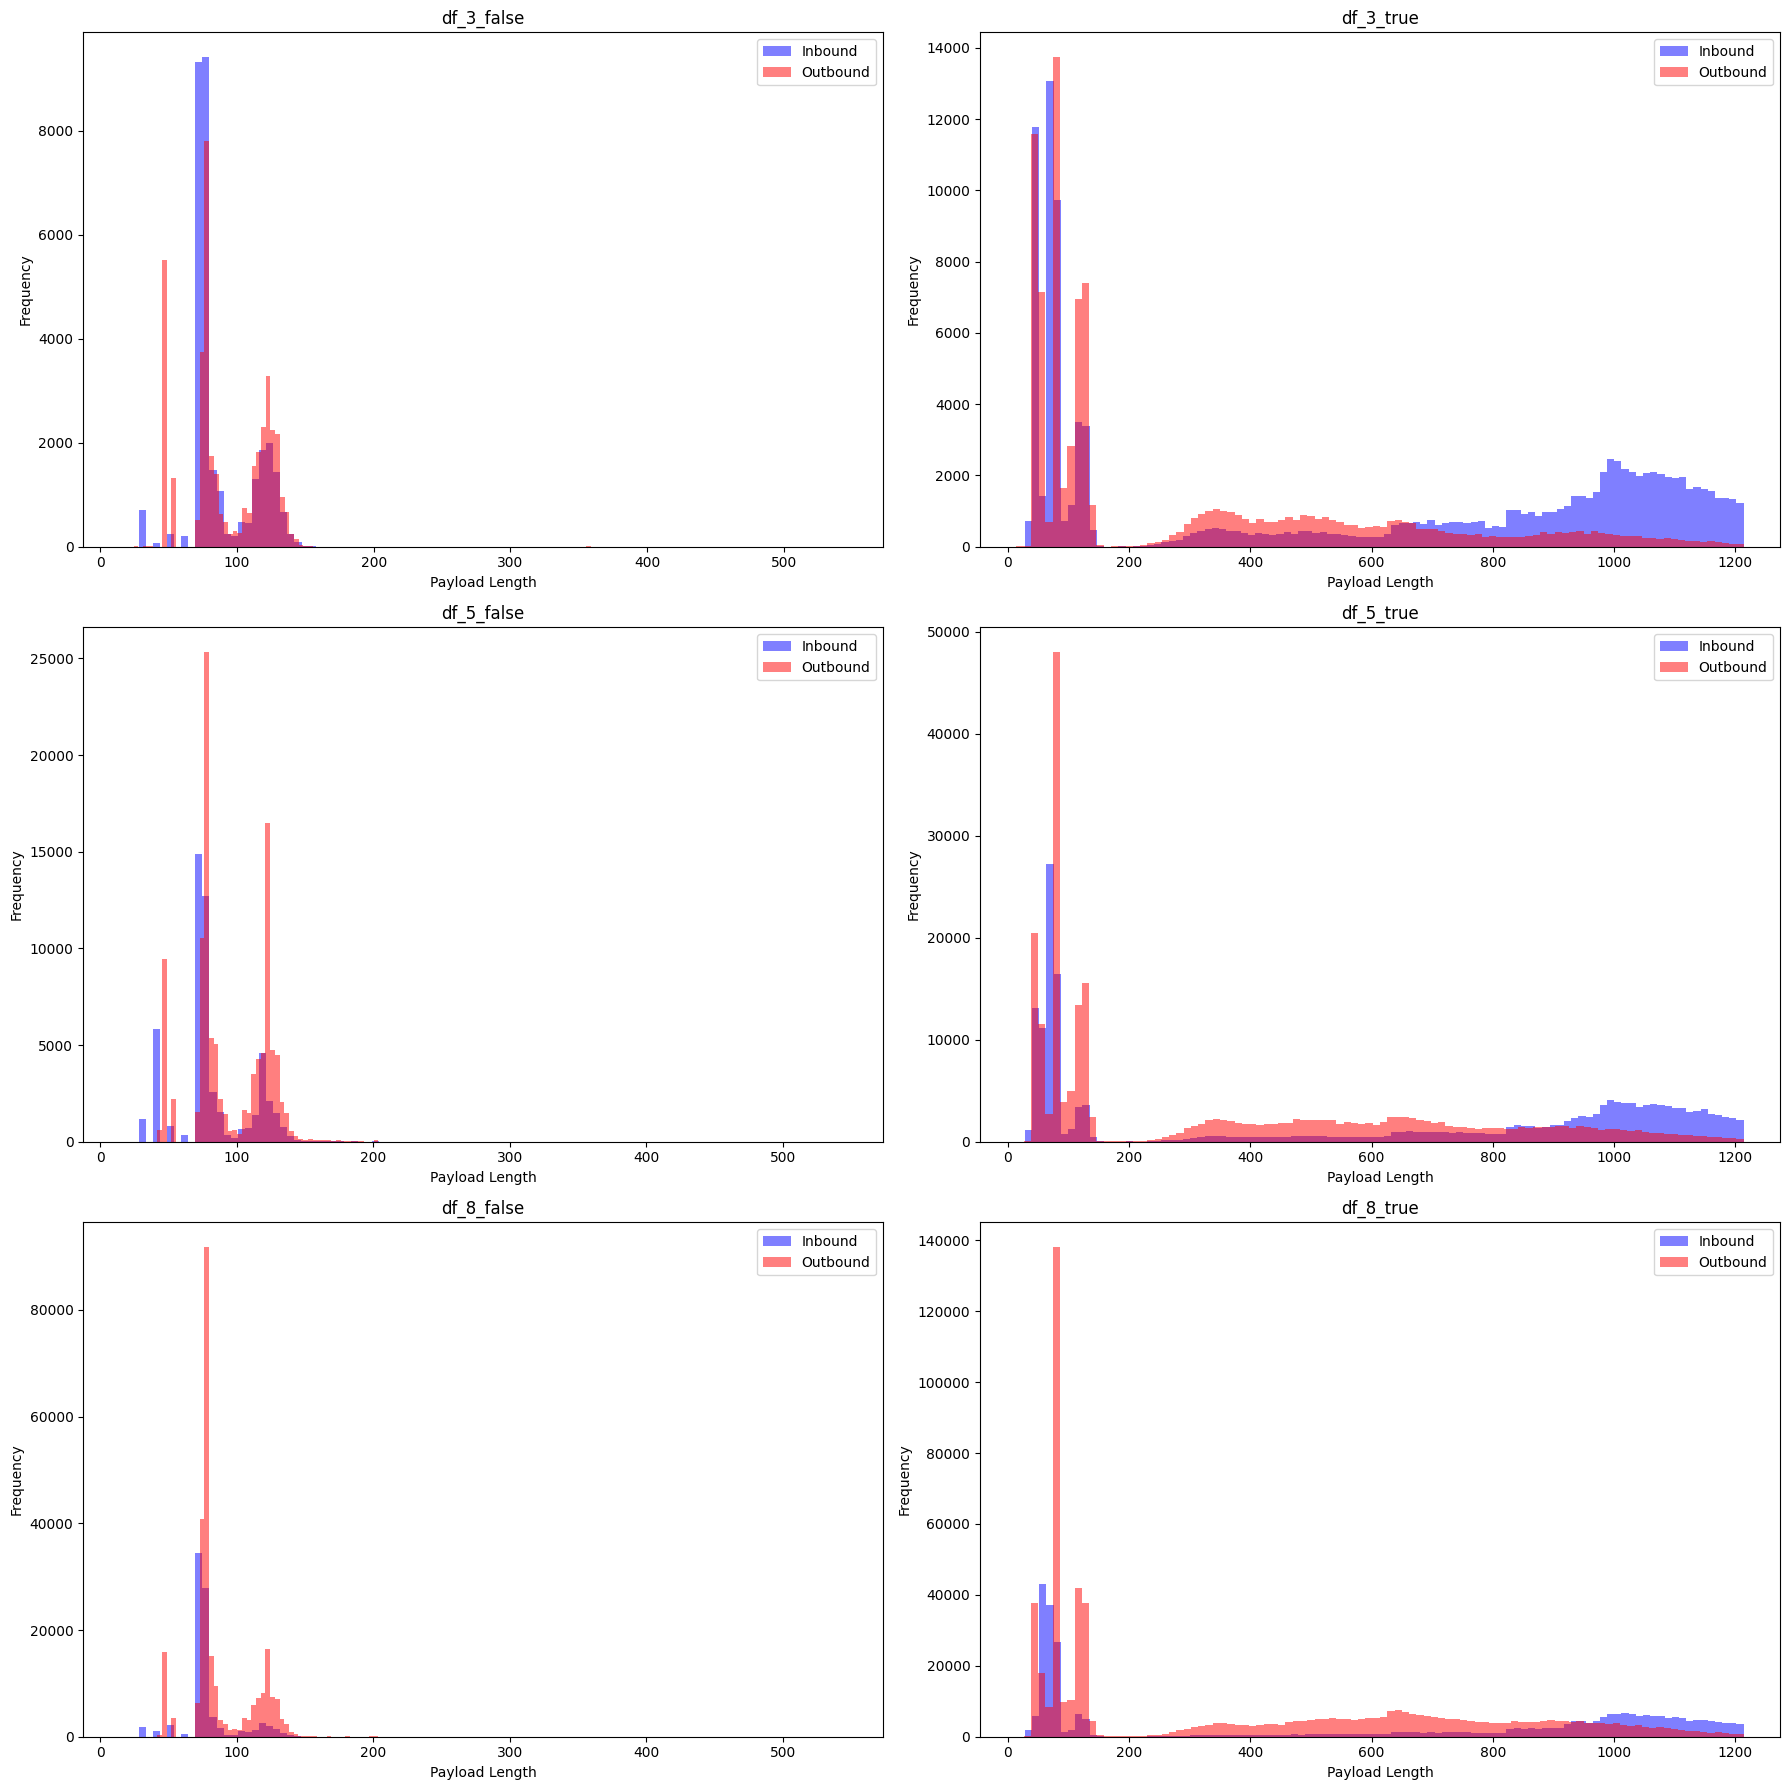

In [51]:
plt.figure(figsize=(18, 18))  # Adjusted for better visibility of two histograms
nrows = 3
ncols = 2

for i, name in enumerate(dataframe_names):
    df = globals()[name]
    
    # Separate inbound and outbound traffic based on port 10000
    df_in = df[df['dst_port'] == 10000]
    df_out = df[df['src_port'] == 10000]
    
    # Create subplot
    plt.subplot(nrows, ncols, i+1)
    
    # Plot histogram for inbound traffic
    plt.hist(df_in['payload_length'], bins=100, alpha=0.5, label='Inbound', color='blue')
    
    # Plot histogram for outbound traffic
    plt.hist(df_out['payload_length'], bins=100, alpha=0.5, label='Outbound', color='red')
    
    # Adding some plot details
    plt.title(name)
    plt.xlabel('Payload Length')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

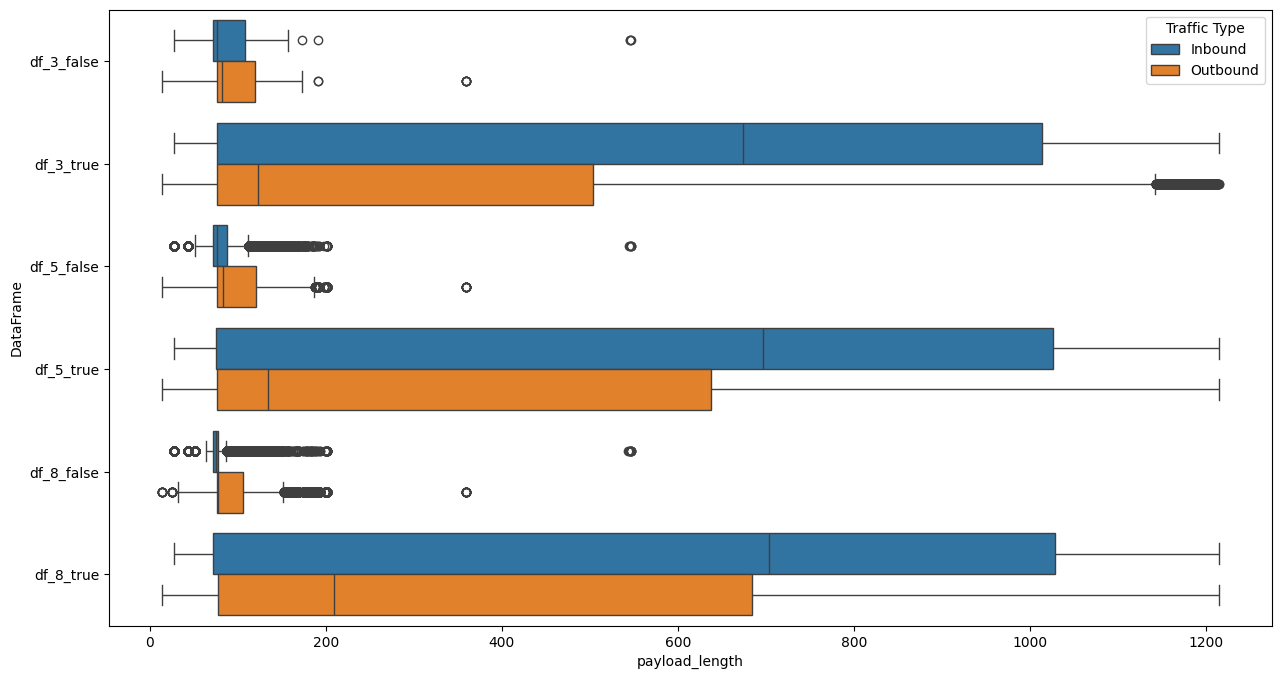

In [53]:
combined_data = []

for name in dataframe_names:
    df = globals()[name]
    
    # Inbound traffic: Destination port is 10000
    df_in = df[df['dst_port'] == 10000].copy()
    df_in['Traffic'] = 'Inbound'  # Mark as inbound
    df_in['DataFrame'] = name
    
    # Outbound traffic: Source port is 10000
    df_out = df[df['src_port'] == 10000].copy()
    df_out['Traffic'] = 'Outbound'  # Mark as outbound
    df_out['DataFrame'] = name
    
    # Combine inbound and outbound data for this DataFrame
    temp_df = pd.concat([df_in, df_out])
    
    # Add to the list for later concatenation
    combined_data.append(temp_df)

# Concatenate all the temporary DataFrames into one
combined_df = pd.concat(combined_data)

plt.figure(figsize=(15, 8))

# Adjust sns.boxplot to differentiate between inbound and outbound within each DataFrame
# The 'hue' parameter is used here to add another dimension to the plot based on traffic direction
sns.boxplot(data=combined_df, y='DataFrame', x='payload_length', hue='Traffic', orient='h')

plt.legend(title='Traffic Type')
plt.show()

**Findings**
- Differences between video on and off are more significant for inbound traffics